In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import chardet as cdt
import numpy as np
%matplotlib inline

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [3]:
train.shape,test.shape

((13730, 167), (4576, 47))

In [4]:
pp.ProfileReport(train)

Number of variables,167
Number of observations,13730
Total Missing (%),8.7%
Total size in memory,17.5 MiB
Average record size in memory,1.3 KiB
Numeric,38
Categorical,59
Boolean,31
Date,0
Text (Unique),1
Rejected,38


In [5]:
pp.ProfileReport(test)

Number of variables,47
Number of observations,4576
Total Missing (%),7.6%
Total size in memory,1.6 MiB
Average record size in memory,376.0 B
Numeric,17
Categorical,14
Boolean,7
Date,0
Text (Unique),1
Rejected,8


# Analise Exploratoria

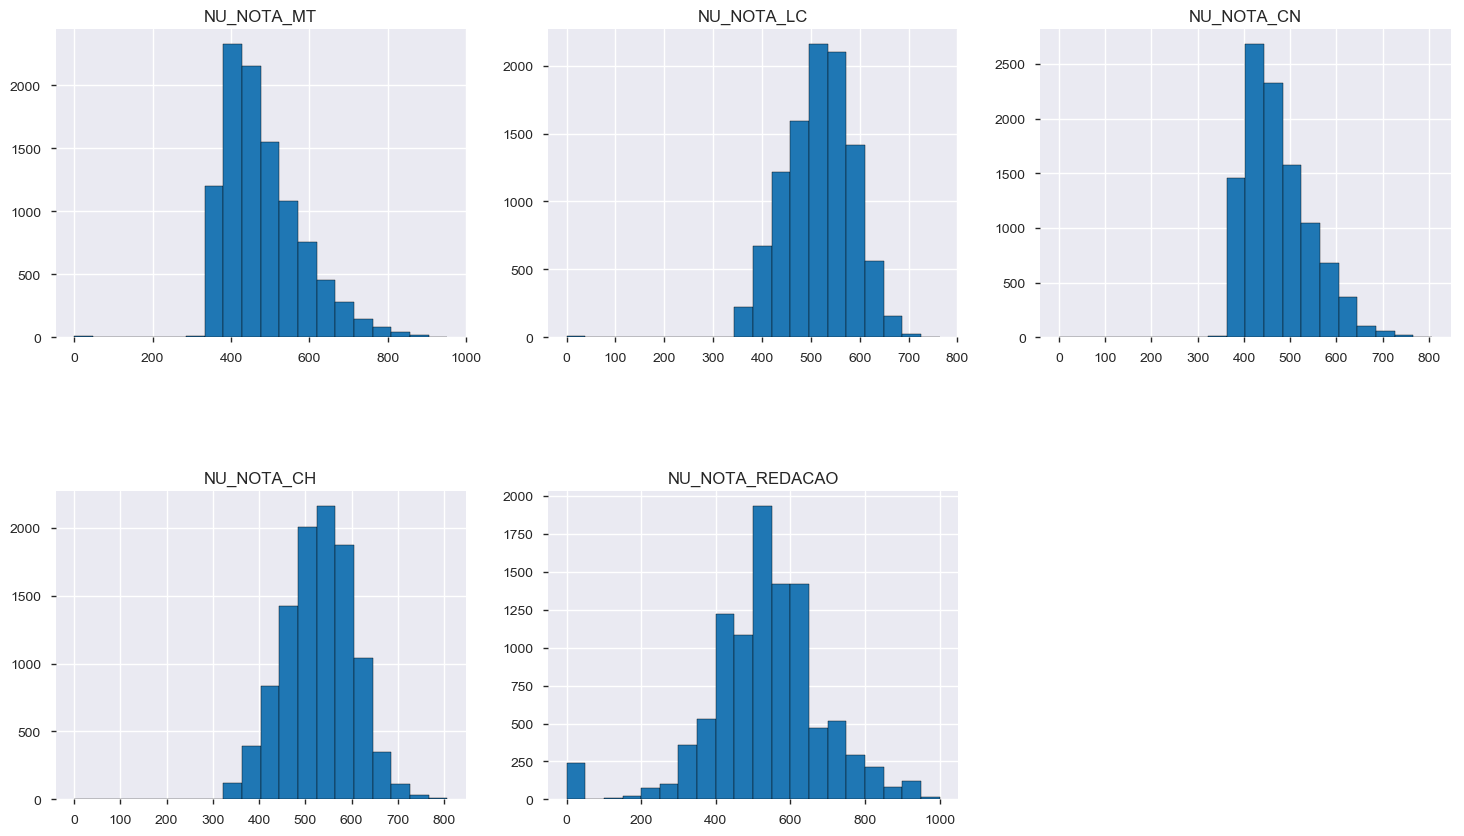

In [6]:
# Análise dos dados
columns= ['NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_REDACAO']
plt.subplots(figsize=(18,10))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    train[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

### Limpeza
    1. Drop 'Unnamed: 0'
    2. Remover dos dados de treino as features que não estão nos dados de teste
    3. Remover colunas com alto indice de missing values
    4. Remover colunas codigo de residencia, inscrição e cegueira
    5. Ajustar features qualitativas e quantitativas

#### 1. Drop 'Unnamed: 0'

In [4]:
train = train.drop(['Unnamed: 0'],axis=1)

##### 2. Remover dos dados de treino as features que não estão nos dados de teste

In [5]:
test.columns
features = ['NU_NOTA_MT','NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047']

In [6]:
train = train[features]

In [10]:
pp.ProfileReport(train)

Number of variables,48
Number of observations,13730
Total Missing (%),7.9%
Total size in memory,5.0 MiB
Average record size in memory,384.0 B
Numeric,19
Categorical,14
Boolean,9
Date,0
Text (Unique),1
Rejected,5


#### 3. Remover colunas com alto indice de missing values

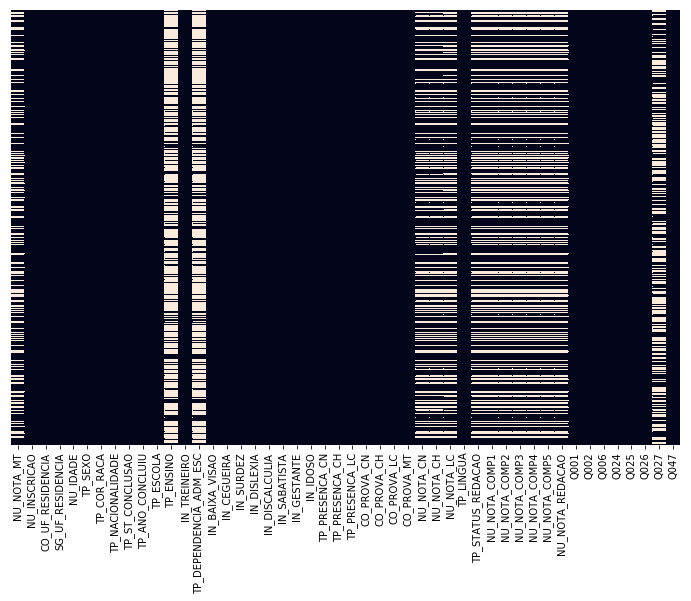

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(train.isnull(),yticklabels= False,cbar=False)

In [8]:
train.isnull().sum()

NU_NOTA_MT                3597
NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGU

In [9]:
train = train.drop(['TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO','Q027'],axis=1)
test = test.drop(['TP_DEPENDENCIA_ADM_ESC', 'TP_ENSINO','Q027'],axis=1)

#### 4. Remover colunas codigo de residencia, inscrição e Discalculia

In [10]:
train = train.drop(['NU_INSCRICAO','CO_UF_RESIDENCIA','IN_CEGUEIRA'],axis=1)
test = test.drop(['NU_INSCRICAO','CO_UF_RESIDENCIA','IN_CEGUEIRA'],axis=1)

In [11]:
train.columns

Index(['NU_NOTA_MT', 'SG_UF_RESIDENCIA', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA',
       'IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_SURDEZ', 'IN_DISLEXIA',
       'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q047'],
      dtype='object')

#### 5. Ajustar features qualitativas e quantitativas

In [12]:
features_f = ['NU_IDADE','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_COMP1', 
                  'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4','NU_NOTA_COMP5', 'NU_NOTA_REDACAO']

features_c = ['SG_UF_RESIDENCIA','TP_SEXO','TP_COR_RACA','TP_NACIONALIDADE', 'TP_ST_CONCLUSAO','TP_ANO_CONCLUIU',
              'TP_ESCOLA','IN_TREINEIRO', 'IN_BAIXA_VISAO', 'IN_DISCALCULIA', 'IN_SURDEZ','IN_DISLEXIA',
              'IN_SABATISTA', 'IN_GESTANTE','IN_IDOSO', 'TP_PRESENCA_CN','TP_LINGUA',
             'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_STATUS_REDACAO','Q001', 'Q002','Q006', 'Q024',
              'Q025', 'Q026', 'Q047','CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT']

In [13]:
for i in features_f:
    train[i]=train[i].astype(float)
    
for i in features_c:
    train[i]=train[i].astype(str)

In [14]:
import numpy as np
train[features_c] = train[features_c].replace('nan',np.nan)

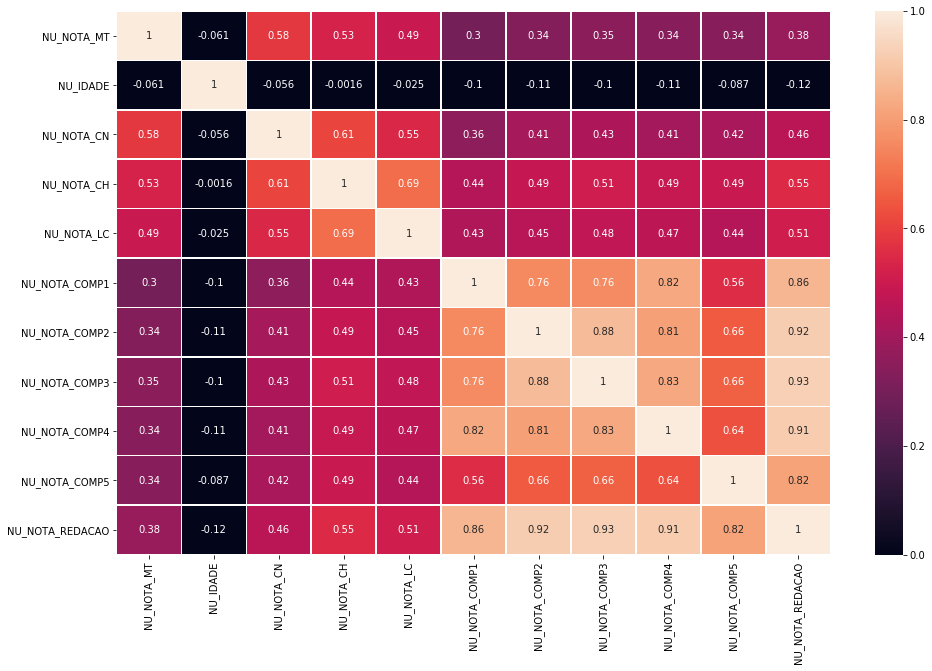

In [15]:
corr_final = train.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_final, vmin=0, vmax=1,linewidth=.5,annot=True)

In [16]:
min(train.NU_NOTA_MT)

0.0

# Preprocessamento

In [116]:
train1 = train.copy()
test1 = test.copy()

###### Retirar as notas zeros, representam uma parcela pifia do registros e vou considerar como outliers

fnotas =  ['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC']
for f in fnotas:
    train1 = train1[train1[f] != 0]

##### Inferir zero aos dados faltantes

In [117]:
train1 = train1.fillna(0)
test1 = test1.fillna(0)

In [118]:
train1.isnull().sum()

NU_NOTA_MT           0
SG_UF_RESIDENCIA     0
NU_IDADE             0
TP_SEXO              0
TP_COR_RACA          0
TP_NACIONALIDADE     0
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIRO         0
IN_BAIXA_VISAO       0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_SABATISTA         0
IN_GESTANTE          0
IN_IDOSO             0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
CO_PROVA_CN          0
CO_PROVA_CH          0
CO_PROVA_LC          0
CO_PROVA_MT          0
NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
TP_LINGUA            0
TP_STATUS_REDACAO    0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047                 0
dtype: int64

In [119]:
test1.isnull().sum()

SG_UF_RESIDENCIA     0
NU_IDADE             0
TP_SEXO              0
TP_COR_RACA          0
TP_NACIONALIDADE     0
TP_ST_CONCLUSAO      0
TP_ANO_CONCLUIU      0
TP_ESCOLA            0
IN_TREINEIRO         0
IN_BAIXA_VISAO       0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_SABATISTA         0
IN_GESTANTE          0
IN_IDOSO             0
TP_PRESENCA_CN       0
TP_PRESENCA_CH       0
TP_PRESENCA_LC       0
CO_PROVA_CN          0
CO_PROVA_CH          0
CO_PROVA_LC          0
CO_PROVA_MT          0
NU_NOTA_CN           0
NU_NOTA_CH           0
NU_NOTA_LC           0
TP_LINGUA            0
TP_STATUS_REDACAO    0
NU_NOTA_COMP1        0
NU_NOTA_COMP2        0
NU_NOTA_COMP3        0
NU_NOTA_COMP4        0
NU_NOTA_COMP5        0
NU_NOTA_REDACAO      0
Q001                 0
Q002                 0
Q006                 0
Q024                 0
Q025                 0
Q026                 0
Q047                 0
dtype: int64

fnotas =  ['NU_NOTA_MT','NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_REDACAO']
for f in fnotas:
    train1 = train1[train1[f] != 0]
    
fnotas =  ['NU_NOTA_CH','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_REDACAO']
for f in fnotas:
    test1 = test1[test1[f]!=0]

##### Criação da media do primeiro fds da aula

In [120]:
train1['MEDIA_CN_CH'] = train1[['NU_NOTA_CN','NU_NOTA_CH']].mean(axis=1)
test1['MEDIA_CN_CH'] = test1[['NU_NOTA_CN','NU_NOTA_CH']].mean(axis=1)

###### Drop da coluna TP_PRESENCA_CN porque tem a mesma informação da coluna TP_PRESENCA_CH

In [121]:
train1 = train1.drop(['TP_PRESENCA_CN'],axis=1)
test1 = test1.drop(['TP_PRESENCA_CN'],axis=1)

##### Renomeando as colunas sobre presença em provas em presença no fds de provas

In [122]:
train1= train1.rename(columns={'TP_PRESENCA_CH': 'ZERO_CN_CH_POR_AUSENCIA','TP_PRESENCA_LC':'ZERO_LC_MT_POR_AUSENCIA'})
test1= test1.rename(columns={'TP_PRESENCA_CH': 'ZERO_CN_CH_POR_AUSENCIA','TP_PRESENCA_LC':'ZERO_LC_MT_POR_AUSENCIA'})

##### Tendo a vista que a nota da redação é a soma das competencias 1,2,3,4 e 5, vou retirar essas informações e trabalhar apenas com a nota da redação

In [123]:
train1 = train1.drop(['NU_NOTA_COMP1','NU_NOTA_COMP2',
                      'NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5'],axis=1)

test1 = test1.drop(['NU_NOTA_COMP1','NU_NOTA_COMP2',
                      'NU_NOTA_COMP3','NU_NOTA_COMP4', 'NU_NOTA_COMP5'],axis=1)

##### Retirando colunas com o codigo das provas, informacao administrativa

In [124]:
train1 = train1.drop(['CO_PROVA_CN','CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT'],axis=1)
test1 = test1.drop(['CO_PROVA_CN','CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT'],axis=1)

##### Heatmap de correlação retirando valores missing

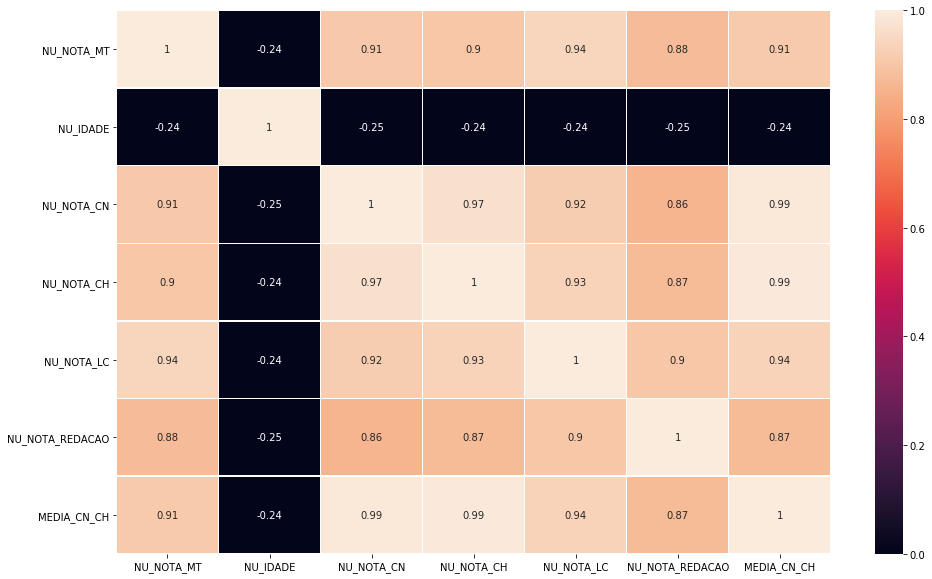

In [125]:
corr_final = train1.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_final, vmin=0, vmax=1,linewidth=.5,annot=True)

train1.ZERO_CN_CH_POR_AUSENCIA = train1.ZERO_CN_CH_POR_AUSENCIA.replace('1','NAO')
train1.ZERO_CN_CH_POR_AUSENCIA = train1.ZERO_CN_CH_POR_AUSENCIA.replace('0','SIM')

train1.ZERO_LC_MT_POR_AUSENCIA = train1.ZERO_LC_MT_POR_AUSENCIA.replace('1','NAO')
train1.ZERO_LC_MT_POR_AUSENCIA = train1.ZERO_LC_MT_POR_AUSENCIA.replace('0','SIM')

##### Remover Discalculia

In [126]:
train1 = train1.drop(['IN_DISCALCULIA'],axis=1)
test1 = test1.drop(['IN_DISCALCULIA'],axis=1)

##### Separando features e target

In [127]:
features = train1.drop(['NU_NOTA_MT'],axis=1)
target_final = train1.NU_NOTA_MT

In [128]:
categoricas = features.describe(include='O').columns
numericas = features.describe().columns

In [129]:
len(categoricas),len(numericas)

(25, 6)

##### Verificar shape antes de concatenar e gerar o get dummies

In [130]:
features.shape,test1.shape

((13730, 31), (4576, 31))

##### concat do treino e test

In [131]:
final_df=pd.concat([features,test1],axis=0)

In [132]:
final_df.shape

(18306, 31)

##### Get Dummies

In [133]:
final_df = pd.get_dummies(final_df)
display(final_df.head())

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,MEDIA_CN_CH,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,24.0,436.3,495.4,581.2,520.0,465.85,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1,17.0,474.5,544.1,599.0,580.0,509.30,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,21.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,25.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,28.0,0.0,0.0,0.0,0.0,0.00,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0


In [134]:
final_df.shape

(18306, 202)

##### verificando duplicated

In [135]:
final_df.loc[:,final_df.columns.duplicated()]

,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_NACIONALIDADE_0,TP_NACIONALIDADE_1,TP_NACIONALIDADE_2,TP_NACIONALIDADE_3,...,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0
0,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


##### pelo fato de concatenar os DF, precisa de remover as colunas duplicadas geradas pelo encoder

In [136]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [137]:
final_df.shape

(18306, 145)

##### Dividindo o DF em train e test de novo. Os números de rows foram previamento registrados

In [138]:
df_train=final_df.iloc[:13730,:]
df_test=final_df.iloc[13730:,:]

In [139]:
df_train.shape,df_test.shape

((13730, 145), (4576, 145))

In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13730 entries, 0 to 13729
Columns: 145 entries, NU_IDADE to Q047_E
dtypes: float64(6), uint8(139)
memory usage: 2.6 MB


In [141]:
df_train.head()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,MEDIA_CN_CH,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,24.0,436.3,495.4,581.2,520.0,465.85,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1,17.0,474.5,544.1,599.0,580.0,509.30,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,21.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,25.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,28.0,0.0,0.0,0.0,0.0,0.00,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0


##### MinMaxScaler

features.columns

In [142]:
#features_numericas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_REDACAO','MEDIA_CN_CH']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#features_minmax = pd.DataFrame(data=df_train)
df_train[numericas] = scaler.fit_transform(df_train[numericas])
df_test[numericas] = scaler.fit_transform(df_test[numericas])

display(df_train.head())

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lucaskenjis\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\lucaskenjis\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,MEDIA_CN_CH,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,0.203704,0.541047,0.613879,0.761131,0.52,0.613768,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
1,0.074074,0.588418,0.674226,0.784442,0.58,0.671014,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
2,0.148148,0.000000,0.000000,0.000000,0.00,0.000000,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
3,0.222222,0.000000,0.000000,0.000000,0.00,0.000000,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,0.277778,0.000000,0.000000,0.000000,0.00,0.000000,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0


##### get_dummies

features_final = pd.get_dummies(features_minmax)
display(features_final.head())

##### Feature Selection

In [143]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif,k=90).fit(df_train,target_final)

results = pd.DataFrame({'Features':list(df_train.columns),"Scores":selector.scores_})
results.sort_values(by='Scores', ascending=False)

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58
 59 60 61 62 63 65 66 67 68 69 70 71 73 74 75 76 77 79 80 82 83 84 85 86
 88 89 90 91 92 93 94 95 96] are constant.
  UserWarning)
C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Features,Scores
87,TP_STATUS_REDACAO_0,804.099917
3,NU_NOTA_LC,90.610952
5,MEDIA_CN_CH,24.080620
1,NU_NOTA_CN,22.226007
2,NU_NOTA_CH,22.120891
4,NU_NOTA_REDACAO,18.513678
129,Q006_Q,3.713021
128,Q006_P,3.176700
126,Q006_N,2.821661
125,Q006_M,2.692803


In [144]:
selected_features_train  = selector.transform(df_train)
selected_features_test = selector.transform(df_test)

In [145]:
selected_features_train

array([[0.2037037 , 0.54104663, 0.61387856, ..., 0.        , 0.        ,
        0.        ],
       [0.07407407, 0.58841766, 0.67422553, ..., 0.        , 0.        ,
        0.        ],
       [0.14814815, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03703704, 0.57105655, 0.65539033, ..., 0.        , 0.        ,
        0.        ],
       [0.42592593, 0.52393353, 0.77038414, ..., 0.        , 0.        ,
        0.        ],
       [0.07407407, 0.60602679, 0.71288724, ..., 0.        , 0.        ,
        0.        ]])

##### Separar dados em treino e teste

In [146]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features_train, 
                                                    target_final, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

## MODELO RandomForestRegressor

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [148]:
rfr = RandomForestRegressor(random_state = 101)
modelo_rfr = rfr.fit(X_train, y_train)

predict = modelo_rfr.predict(X_test)

#Filtro para o predict <280


print('MSE:', mean_squared_error(predict, y_test).round(8)) 

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE: 4161.01597025


## GRID_SEARCH

In [39]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10],
    'min_samples_leaf': [5,10,20],
    'min_samples_split': [8, 10],
    'n_estimators': [100,200]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 8,
 'n_estimators': 200}

{'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 8,
 'n_estimators': 200}

In [154]:
rfr = RandomForestRegressor(n_estimators= 200, min_samples_leaf =10 ,min_samples_split =8, max_depth = 10,random_state = 101)
modelo_rfr = rfr.fit(X_train, y_train)

predict = modelo_rfr.predict(X_test)
mse = mean_squared_error(predict, y_test)
print('MSE:', mse) 

MSE: 3751.5572816514305


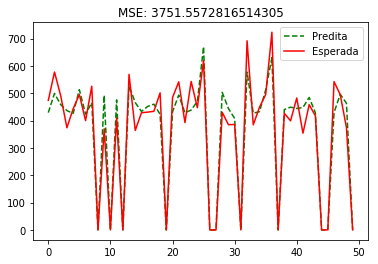

In [158]:
previsto = np.array(predict)
real = np.array(y_test)

y1 = predict[:50]
x1 = range(len(y1))
y2 = y_test[:50]
x2 = range(len(y2))

plt.title('MSE: {}'.format(mse))
plt.plot(x1,y1,color='green',linestyle='--',label='Predita')
plt.plot(x2,y2,color='red',linestyle='-', label = 'Esperada')
plt.legend()
plt.show()

In [159]:
import xgboost
from xgboost import plot_importance

##### XGBOOST naive

In [160]:
model = xgboost.XGBRegressor(seed=101) 

model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
mse

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:50:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3733.3688948550375

##### XGBOOST Grid

In [161]:
from sklearn.model_selection import GridSearchCV

param = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'learning_rate': [.01,.05,.1],
              'max_depth': [2,3,5],
              'silent': [1],
              'n_estimators': [900,1200]}

gsearch1 = GridSearchCV(estimator = model, param_grid = param,cv = 2,
                        n_jobs = 5,
                        verbose=True,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  36 out of  36 | elapsed:  3.3min finished
C:\Users\lucaskenjis\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=101,
       silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'nthread': [4], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [2, 3, 5], 'silent': [1], 'n_estimators': [900, 1200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=True)

In [162]:
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)

best params
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 900, 'nthread': 4, 'silent': 1}
best score
-3921.6712910877764


##### XGBOOST COM HYPERP.

In [184]:
model = xgboost.XGBRegressor(learning_rate=0.01,max_depth = 3,n_estimators= 900,seed=101) 

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

#Segundo o Enem, a menor nota foi 287
y_pred[y_pred<280] = 0

mse = mean_squared_error(y_pred, y_test)
mse

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:10:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3724.0234201175526

##### DF para CSV

In [347]:
c = pd.DataFrame(y_test)
c.columns = ['NOTA_REAL']
c= c.reset_index(drop=True)
c['NOTA_PREVISTA'] = ' '
for i, val in enumerate(y_pred):
    c['NOTA_PREVISTA'][i] = format(val, '.1f')

C:\Users\lucaskenjis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


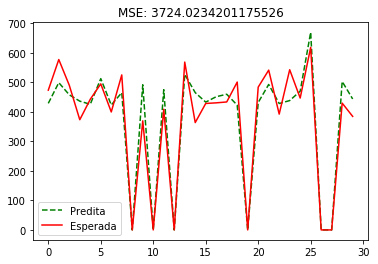

In [350]:
previsto = np.array(c['NOTA_PREVISTA'])
real = np.array(c['NOTA_REAL'])

y1 = predict[:30]
x1 = range(len(y1))
y2 = y_test[:30]
x2 = range(len(y2))

plt.title('MSE: {}'.format(mse))
plt.plot(x1,y1,color='green',linestyle='--',label='Predita')
plt.plot(x2,y2,color='red',linestyle='-', label = 'Esperada')
plt.legend()
plt.show()

##### Preparando os dados do test.csv

In [364]:
t = pd.read_csv('test.csv')

In [377]:
y_pred = model.predict(selected_features_test)

#Segundo o Enem, a menor nota foi 287
y_pred[y_pred<280] = 0

In [378]:
a = pd.DataFrame(t['NU_INSCRICAO'])
#a.columns = ['NOTA_REAL']
a= a.reset_index(drop=True)
a['NU_NOTA_MT'] = ' '
for i, val in enumerate(y_pred):
    a['NU_NOTA_MT'][i] = format(val, '.1f')

In [379]:
y_pred.shape

(4576,)

In [380]:
a

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,422.2
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,459.7
2,b38a03232f43b11c9d0788abaf060f7366053b6d,648.5
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,0.0
4,715494628a50142ce8cb17191cfe6d0f3cae0934,568.6
5,e656d6bad65c93fb2880f1eba5037008c8e75774,493.0
6,465cd2a6907fb37d9d8ad3c065f0e2dabdba9b13,561.9
7,11539e86171bf07d3a36f09377d7f54ebcc8406a,428.5
8,043c544a2104aa8a9849f1a703a08d37a2f16839,463.2
9,76ba050e64ad100b856f0eaabd8f539d5c7dd185,459.5


In [381]:
a.to_csv('answer.csv',index=False)